In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 한글 설정
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname="/Users/dofany/dofany_study/python/analysis/data/ImcreSoojin OTF.otf").get_name()
# plt.rc("font", family=font_name)

import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

import requests
from urllib.request import urlopen 
from bs4 import BeautifulSoup
import urllib.parse
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
from selenium import webdriver

# 시카고 샌드위치 맛집 분석
+ https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/

## 데이터 불러오기

In [4]:
url = "https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/"
headers={"User-Agent":"Mozilla/5.0"} # 로봇인지 아닌지 인증
html = requests.get(url, headers=headers)
html

soup = BeautifulSoup(html.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:ho

In [5]:
print(soup.find_all("div","sammy"))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-R

In [6]:
len(soup.find_all("div","sammy"))

50

### 50개 데이터 중 첫번째 데이터 가져오기

In [7]:
one = soup.find_all("div","sammy")[0]
print(type(one))
print(one)

<class 'bs4.element.Tag'>
<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


### 랭킹 가져오기

In [8]:
one.find(class_="sammyRank").get_text()

'1'

### 메뉴 이름과 가게 이름 가져오기

In [9]:
import re

one_list = one.find(class_="sammyListing").get_text()

store = one.find(class_="sammyListing").get_text().split(sep='\n')
print(store[0])
print(store[1])

print('-----------------------------------------------------------------')

print(re.split(("\n|\r\n"),one_list)[0])
print(re.split(("\n|\r\n"),one_list)[1])

BLT
Old Oak Tap
-----------------------------------------------------------------
BLT
Old Oak Tap


#### a 태그에서 href 값 가져오기

In [10]:
url = one.find("a")["href"]
print(url)

/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/


#### 링크 경로의 형식이 동일하지 않기 때문에 똑같이 맞춰준다.

In [11]:
base = "https://www.chicagomag.com"

print(base + url)

print(urllib.parse.urljoin(base,url))

https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/
https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/



## 각 데이터 수집
+ rank
+ main menu
+ cafe name
+ url = read_more의 링크

In [12]:
rank = []
main_menu = []
cafe_name = [] 
read_more = []
url = "https://www.chicagomag.com"

total = soup.find_all("div","sammy")

for i in total:
    rank.append(i.find(class_="sammyRank").get_text())
    
    lst = i.find(class_="sammyListing").get_text()
    main_menu.append(re.split(("\n|\r\n"), lst)[0])
    cafe_name.append(re.split(("\n|\r\n"), lst)[1])
    
    read_more.append(urllib.parse.urljoin(url, i.find("a")["href"]))

In [13]:
len(rank)

50

## DataFrame에 저장

In [14]:
data = {"Rank":rank, "Cafe":cafe_name, "Menu":main_menu, "ReadMore":read_more}
df = pd.DataFrame(data)
df.head()

,Rank,Cafe,Menu,ReadMore
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


## checkpoint

In [93]:
df.to_csv("data/sandwiches.csv", sep=",", encoding="utf-8")

In [15]:
df = pd.read_csv("data/sandwiches.csv", index_col=0)
df.head()

,Rank,Cafe,Menu,ReadMore
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


## 상세 페이지 데이터 가져오기

In [16]:
url = df["ReadMore"][0]
html = requests.get(url, headers={"User-Agent":"Mozilla/5.0"})
soup = BeautifulSoup(html.text, "html.parser")
soup

detail = soup.find("p","addy").get_text()
print(detail)

detail_split = detail.split()
print(detail_split)

# 가격 가져오기
print(detail_split[0][:-1])

# 주소 가져오기
' '.join(detail_split[1:-2])



$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com
['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']
$10


'2109 W. Chicago Ave.,'

### 각 데이터 수집 : 가격, 주소
+ Jupyter notebook에서 상태 진행바를 보여주기
    - conda install -c conda-forge tqdm

In [17]:
from tqdm import tqdm_notebook
from time import sleep

In [19]:
price = []
address = []

for i in tqdm_notebook(df.index):
    html = requests.get(df["ReadMore"][i],headers={"User-Agent" :"Mozilla/5.0"})
    soup = BeautifulSoup(html.text, "html.parser")
    
    detail = soup.find("p", "addy").get_text()
    
    price.append(detail.split()[0][ :-1])
    address.append(' '.join(detail.split()[1:-2]))
    

  0%|          | 0/50 [00:00<?, ?it/s]

In [20]:
print(len(price), len(address))
print(price[:5])
print(address[:5])

50 50
['$10', '$9', '$9.50', '$9.40', '$10']
['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,', '914 Noyes St., Evanston,', '825 W. Fulton Mkt.,']


### 두 개의 정보를 DataFrame에 추가 

In [21]:
df['Price'] = price
df["Address"] =  address
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


## checkpoint

In [18]:
df.to_csv("data/sandwiches_final.csv", encoding="utf-8")

In [22]:
df = pd.read_csv("Data/sandwiches_final.csv", index_col=0)
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


## 맛집의 위치를 지도에 표시

In [2]:
import folium

In [24]:
df = pd.read_csv('data/sandwiches_map.csv', index_col=0)
df.head(5)

,Menu,Cafe,ReadMore,Price,Address,Latitude,Longitude
Rank,,,,,,,
1,BLT,Old Oak Tap,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,41.895605,-87.679961
2,Fried Bologna,Au Cheval,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,41.884658,-87.647667
3,Woodland Mushroom,Xoco,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,41.890523,-87.630783
4,Roast Beef,Al’s Deli,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,914 Noyes St.,42.058322,-87.683748
5,PB&L,Publican Quality Meats,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,41.886604,-87.648536


In [25]:
map = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()], zoom_start=11)
folium.Marker([df['Latitude'].mean(), df['Longitude'].mean()], popup='center').add_to(map)
map

# 네이버 영화 평점 기준으로 영화 평점 변화 분석
+ http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806

## 데이터 준비

In [5]:
url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170806" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


## 샘플 코드 작성

In [32]:
name = soup.find_all("div", "tit5")
print(len(name))
print(name[0].get_text())

47

다크 나이트



### 평점 수집

In [37]:
point = soup.find_all("td",class_="point")
print(len(point))
print(point[0].get_text())

47
9.32


### 47개의 영화 제목과 평점을 리스트 저장

In [41]:
movie_name = [soup.find_all("div","tit5")[n].get_text() for n in range(47)]
movie_point = [soup.find_all("td","point")[n].get_text() for n in range(47)]

In [43]:
print(movie_name,sep="\n")
print(movie_point,sep="\n")

['\n다크 나이트\n', '\n킹 오브 프리즘 프라이드 더 히어로\n', '\n킹 오브 프리즘\n', '\n내 사랑\n', '\n오즈의 마법사\n', '\n서서평, 천천히 평온하게\n', '\n로보캅\n', '\n플립\n', '\n헤드윅\n', '\n댄서\n', '\n이터널 선샤인\n', '\n명탐정 코난:진홍의 연가\n', '\n샤인\n', '\n택시운전사\n', '\n올드보이\n', '\n어네스트와 셀레스틴\n', '\n기쿠지로의 여름\n', '\n파도가 지나간 자리\n', '\n노무현입니다\n', '\n파이트 클럽\n', '\n스타쉽 트루퍼스\n', '\n청원\n', '\n토탈 리콜\n', '\n극장판 짱구는 못말려 : 습격!! 외계인 덩덩이\n', '\n너의 이름은.\n', '\n연애담\n', '\n슈퍼배드 3\n', '\n꿈의 제인\n', '\n심야식당2\n', '\n라라랜드\n', '\n카3: 새로운 도전\n', '\n오두막\n', '\n스파이더맨: 홈커밍\n', '\n옥자\n', '\n500일의 썸머\n', '\n복수는 나의 것\n', '\n덩케르크\n', '\n예수는 역사다\n', '\n매치 포인트\n', '\n7번째 내가 죽던 날\n', '\n47 미터\n', '\n친절한 금자씨\n', '\n송 투 송\n', '\n그 후\n', '\n박쥐\n', '\n싸이보그지만 괜찮아\n', '\n군함도\n']
['9.32', '9.27', '9.25', '9.24', '9.23', '9.23', '9.21', '9.20', '9.18', '9.14', '9.10', '9.10', '9.09', '9.08', '9.05', '9.05', '9.02', '9.00', '8.93', '8.91', '8.90', '8.87', '8.86', '8.83', '8.76', '8.75', '8.73', '8.70', '8.62', '8.59', '8.58', '8.48', '8.48', '8.47', '8.39', '8.34', '8.32', '8.12', '7.97

## 2017년 5월 1일부터 100일간의 데이터 수집

In [3]:
from tqdm import tqdm_notebook

In [16]:
daterange = pd.date_range("2017-5-1", periods=100, freq='D')
movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(daterange):
    url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}"
    page = urlopen(url.format(today.strftime("%Y%m%d")))
    soup = BeautifulSoup(page, "html.parser")
    
    cnt = len(soup.find_all("td","point"))
    
    movie_date.extend([today for i in range(cnt)])
    movie_name.extend([soup.find_all("div","tit5")[n].get_text().strip("\n") for n in range(cnt)])
    movie_point.extend(soup.find_all("td","point")[n].get_text().strip("\n") for n in range(cnt))

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [20]:
movie = pd.DataFrame({"date":movie_date, "name":movie_name, "point":movie_point})
movie

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
...,...,...,...
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17


In [31]:
movie["point"] = movie["point"].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


## EDA

### 영화별로 점수의 합계를 보고 싶다.(평점의 합계가 높은 순 또는 낮은 순으로 10개씩)

In [38]:
m_point = pd.pivot_table(movie, index=["name"], aggfunc="sum")
display(m_point.head())

m_best = m_point.sort_values(by="point", ascending=False)
display(m_best.head())



,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48


,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


### 특정 영화만 추려서 보고 싶다. (예를 들어 겟아웃)

In [49]:
getout = movie.query("name == ['겟 아웃']")
getout.head()

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18


### 위에 조회한 영화에 대해 날짜별 평점으로 시각화

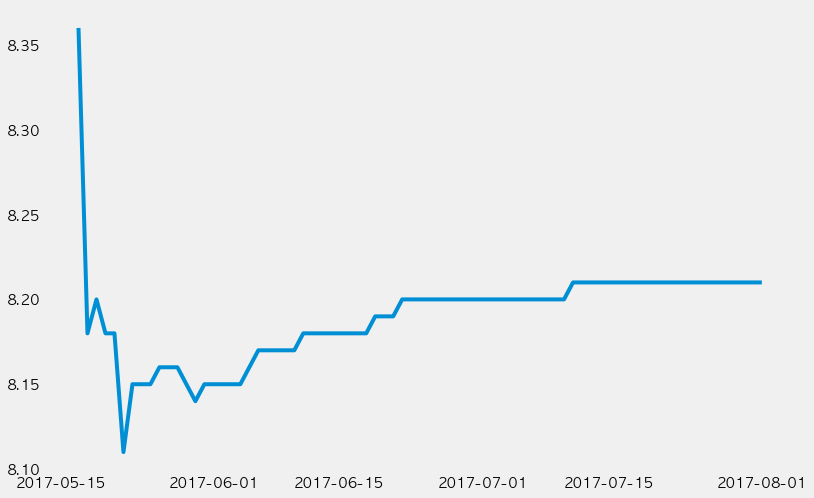

In [53]:
plt.figure(figsize=(12,8))
plt.plot(getout['date'], getout['point'])
plt.grid()

### 영화별 날짜 변화에 따른 평점 변화를 확인

In [57]:
movie2 = pd.pivot_table(movie, index = ['date'], columns = ["name"], values=['point'])
movie2

movie2.columns = movie2.columns.droplevel()
movie2.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


### 몇 개의 영화를 뽑아 평점 변화에 대한 시각화 구현

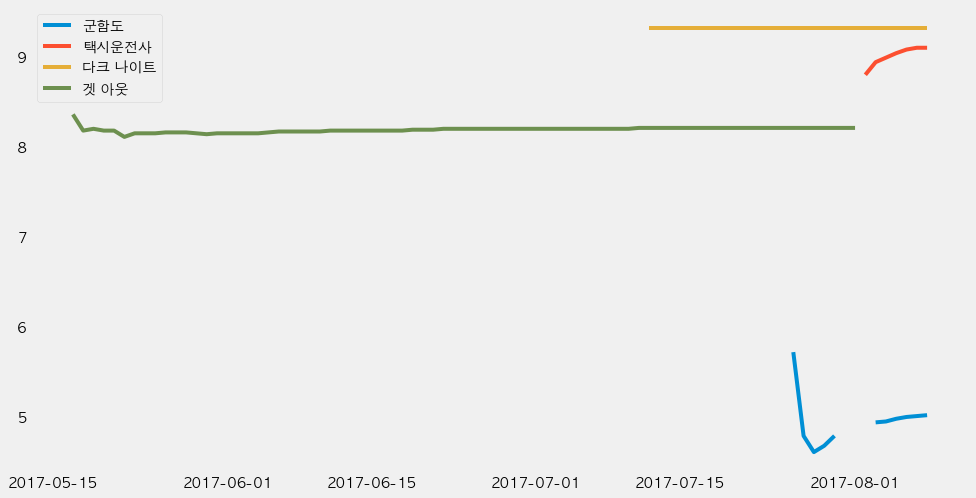

In [60]:
target = ["군함도", "택시운전사","다크 나이트","겟 아웃"]
plt.figure(figsize=(15,8))
plt.plot(movie2[target])
plt.legend(target, loc="best")
plt.grid()